# **Student Performance in Exams Data Analysis**

## **Table of Contents**

#### * [Introduction](#section-1)
#### * [Countplots](#section-2)
#### * [Box Plots](#section-3)
#### * [Pass Rate](#section-4)
#### * [Conclusion](#section-5)

<a id = 'section-1'></a>
## Introduction

In this session, I will use various methods of exploratory data analysis to examine the characteristics of the "Students Performance in Exams" dataset.

The data contains eight variables used to explore the effect of various factors on test scores. The variables are: 

* Gender - male or female
* Race/Ethnicity - split into 5 Groups (A, B, C, D, E)
* Parent Education Level - a student's parent's highest level of education
* Lunch - whether a student is in the standard or free/reduced lunch program
* Test Prep Course - whether or not a student completed the test preparation course
* Math Score
* Reading Score
* Writing Score

**Note: this is a fictional dataset used strictly for to demonstrate beginner data analysis skills. The results are not official and should not be used to conclude actual relationships between the variables listed and education.**

Below are the imports for the packages that will be used in the session:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

The dataframe is read in from my Google Drive, and is then saved as 'students'.

In [2]:
students = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

Next, the dataframe is viewed using head() and info(). In addition, the describe() function displays basic statistical calculations for the three integers (math score, reading score, and writing score).

From below, it is seen that there are 1,000 entries in the data, with 11 total columns. In addition, the majority of the data is saved as string objects. 

In [3]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Next, a line of code is run to see if there are any null values present in the dataframe. This can also be seen in the info() function above. 

In [6]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In addition, there's a check to see if there are any duplicates in the dataframe.

In [7]:
students.duplicated().sum()

0

A pairplot is created to see the distribution of the numerical data among males and females.

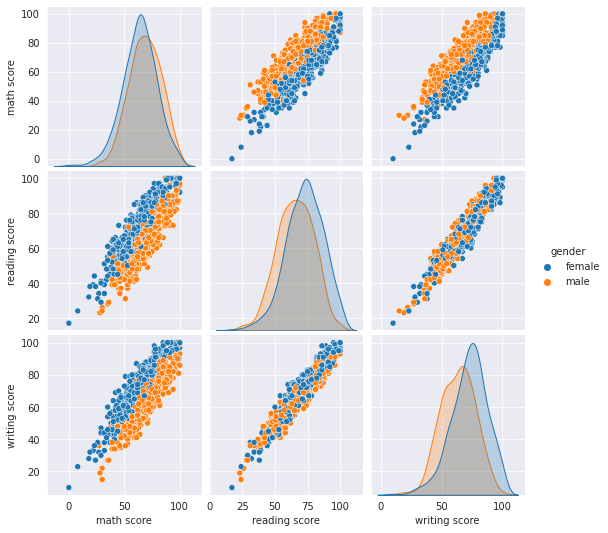

In [8]:
sns.pairplot(students, hue = 'gender')

<a id = 'section-2'></a>
## **Countplots**

Various countplots are created to see the distribution of the data among the categorical variables. The variables are: gender, race/ethnicity, parental level of education, test preparation course, and lunch.

<AxesSubplot:xlabel='gender', ylabel='count'>

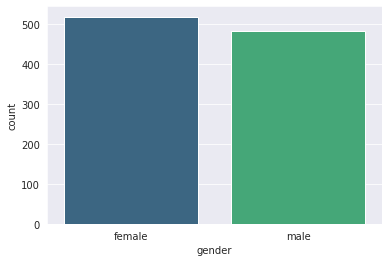

In [9]:
sns.countplot(x = 'gender', data = students, palette = 'viridis')

In [10]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

From the gender countplot and count table, there are more females than males in the data. This is something to keep in mind when determining if there is a difference in test scores between the two genders.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

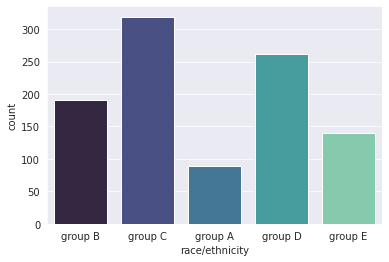

In [11]:
sns.countplot(x = 'race/ethnicity', data = students, palette = 'mako')

In [12]:
students['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

From the race/ethnicity countplot and count table, the groups are not equally distributed among the data. For example, there are significantly more participants in group C compared to group A. This is something to keep in mind when determining if there is a difference in test scores between race/ethnicity.

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

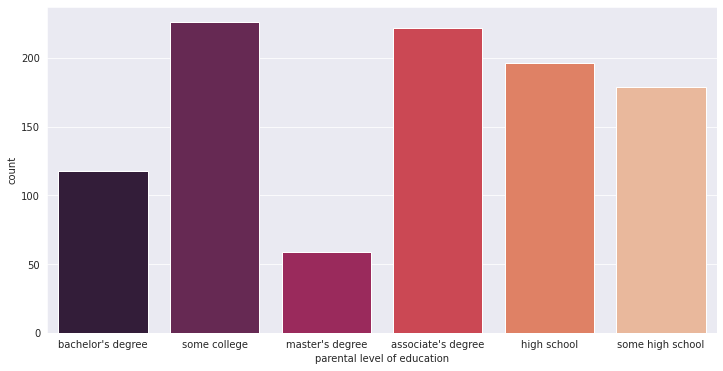

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'parental level of education', data = students, palette = 'rocket')

In [14]:
students['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

From the parental level of education countplot and count table, the groups are not equally distributed among the data. For example, there are significantly more participants in whose parents received some college education compared to participants whose parents earned a master's degree. This is something to keep in mind when determining if there is a difference in test scores between parental level of education.

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

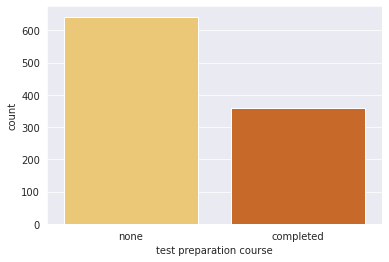

In [15]:
sns.countplot(x = 'test preparation course', data = students, palette = 'YlOrBr')

In [16]:
students['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

From the test preparation course countplot and count table, there are significantly more students who did not complete the test preparation course compared to students who did complete the test preparation course. This is something to keep in mind when determining if there is a difference in test scores between test preparation course (yes/no).

<AxesSubplot:xlabel='lunch', ylabel='count'>

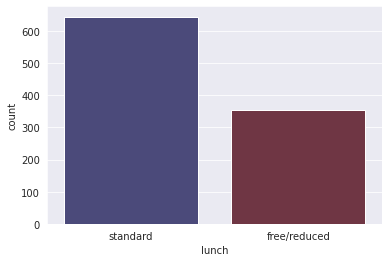

In [17]:
sns.countplot(x = 'lunch', data = students, palette = 'icefire')

In [18]:
students['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

From the lunch countplot and count table, there are significantly more students who are in the standard lunch program compared to participants who are part of the free/reduced lunch program. This is something to keep in mind when determining if there is a difference in test scores between type of lunch program.

<a id = 'section-3'></a>
## **Box Plots**

Box Plots are also created to view the distribution of the various test scores among each categorical variable.

<AxesSubplot:xlabel='gender', ylabel='math score'>

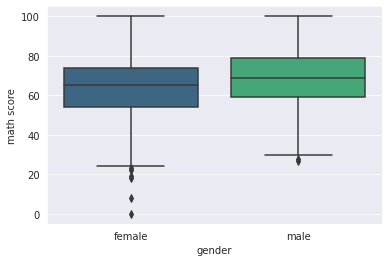

In [19]:
sns.boxplot(x = 'gender', y = 'math score', data = students, palette = 'viridis')

<AxesSubplot:xlabel='gender', ylabel='writing score'>

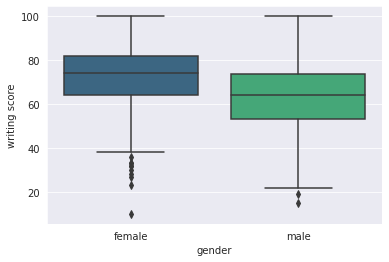

In [20]:
sns.boxplot(x = 'gender', y = 'writing score', data = students, palette = 'viridis')

<AxesSubplot:xlabel='gender', ylabel='reading score'>

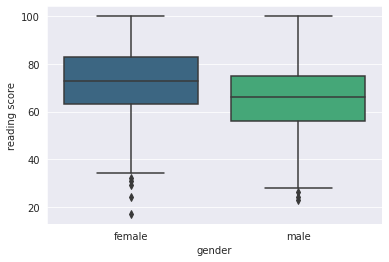

In [21]:
sns.boxplot(x = 'gender', y = 'reading score', data = students, palette = 'viridis')

From the box plots based on gender, there appears to be a difference in test scores between the two genders. It appears males performed better on the math exam, while females performed better on the reading and writing exams.

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

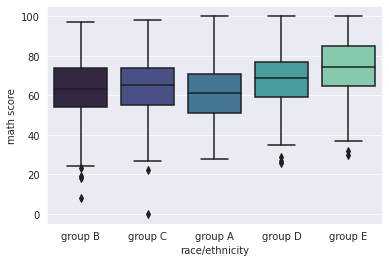

In [22]:
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = students, palette = 'mako')

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

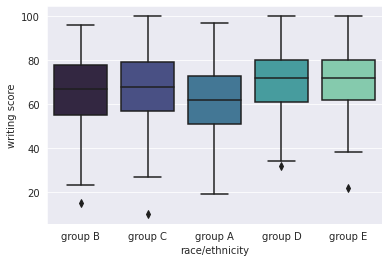

In [23]:
sns.boxplot(x = 'race/ethnicity', y = 'writing score', data = students, palette = 'mako')

<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

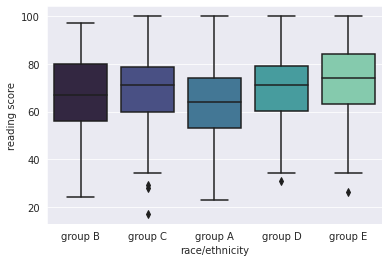

In [24]:
sns.boxplot(x = 'race/ethnicity', y = 'reading score', data = students, palette = 'mako')

From the box plots based on race/ethnicity, there appears to be a difference in test scores between each group.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

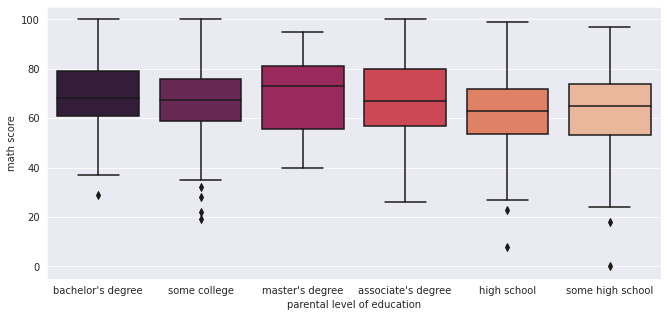

In [25]:
plt.figure(figsize = (11,5))
sns.boxplot(x = 'parental level of education', y = 'math score', data = students, palette = 'rocket')

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

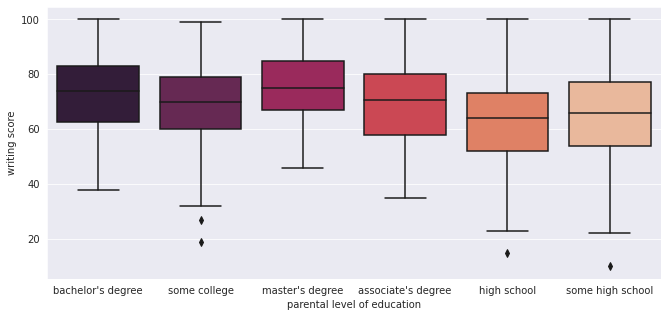

In [26]:
plt.figure(figsize = (11,5))
sns.boxplot(x = 'parental level of education', y = 'writing score', data = students, palette = 'rocket')

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

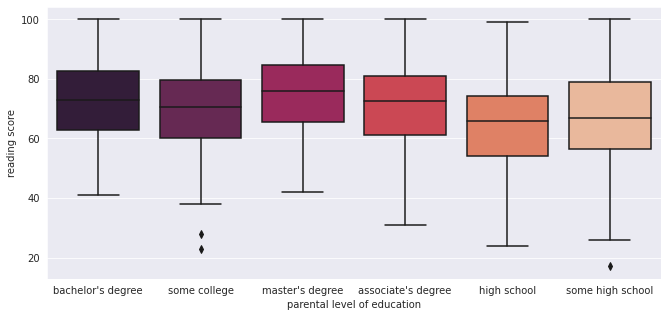

In [27]:
plt.figure(figsize = (11,5))
sns.boxplot(x = 'parental level of education', y = 'reading score', data = students, palette = 'rocket')

From the box plots based on parental level of education, there appears to be a difference in test scores between each group.

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

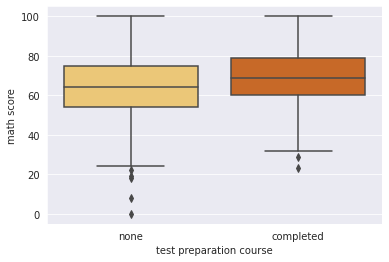

In [28]:
sns.boxplot(x = 'test preparation course', y = 'math score', data = students, palette = 'YlOrBr')

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

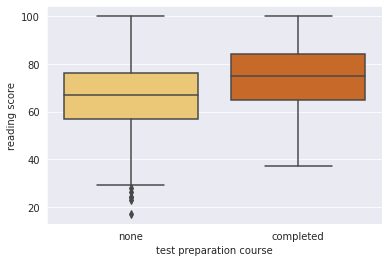

In [29]:
sns.boxplot(x = 'test preparation course', y = 'reading score', data = students, palette = 'YlOrBr')

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

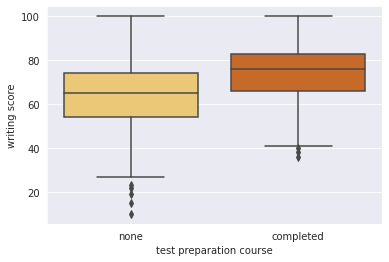

In [30]:
sns.boxplot(x = 'test preparation course', y = 'writing score', data = students, palette = 'YlOrBr')

From the box plots based on test preparation course, there appears to be a difference in test scores between the two groups.

<AxesSubplot:xlabel='lunch', ylabel='math score'>

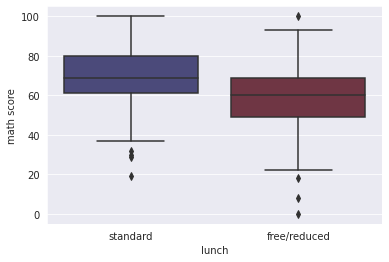

In [31]:
sns.boxplot(x = 'lunch', y = 'math score', data = students, palette = 'icefire')

<AxesSubplot:xlabel='lunch', ylabel='reading score'>

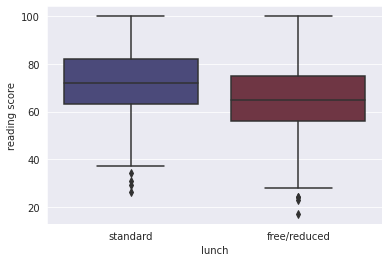

In [32]:
sns.boxplot(x = 'lunch', y = 'reading score', data = students, palette = 'icefire')

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

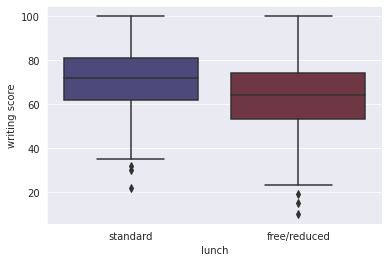

In [33]:
sns.boxplot(x = 'lunch', y = 'writing score', data = students, palette = 'icefire')

From the box plots based on lunch program, there appears to be a difference in test scores between the two groups.

<a id = 'section-4'></a>
## **Pass Rate**

Below are the tables and charts created to examine the pass rates for each exam.

First, the pass_rate variable is set at 60. I assume the passing grade is 60%, though this can be changed to the desirable pass percentage.

In [34]:
pass_rate = 60

Next, a pass rate column is created for math, reading, and writing scores. 
These will be used for each group to determine the percentage of students that passed.

In [35]:
students['Math_PassRate'] = np.where(students['math score'] < pass_rate, 'Fail', 'Pass')
students.Math_PassRate.value_counts()

Pass    677
Fail    323
Name: Math_PassRate, dtype: int64

In [36]:
students['Reading_PassRate'] = np.where(students['reading score'] < pass_rate, 'Fail', 'Pass')
students.Reading_PassRate.value_counts()

Pass    746
Fail    254
Name: Reading_PassRate, dtype: int64

In [37]:
students['Writing_PassRate'] = np.where(students['writing score'] < pass_rate, 'Fail', 'Pass')
students.Writing_PassRate.value_counts()

Pass    719
Fail    281
Name: Writing_PassRate, dtype: int64

From the new column values above, we can also see more students passed the reading exam, while more students failed the math exam. 

Below is the new dataframe based on the columns added:

In [38]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassRate,Reading_PassRate,Writing_PassRate
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Fail,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


From the columns created, a frequency table can be created to show the pass rate for each grouping. Below is the pass rate table and count plot for males and females on the math exam:

In [39]:
math_table = pd.crosstab(index = students['gender'], columns = students['Math_PassRate'])
math_table['PercentPass'] = round(math_table['Pass'] / (math_table['Pass'] + math_table['Fail'])*100,2)
math_table

Math_PassRate,Fail,Pass,PercentPass
gender,,,
female,197,321,61.97
male,126,356,73.86


<AxesSubplot:xlabel='gender', ylabel='count'>

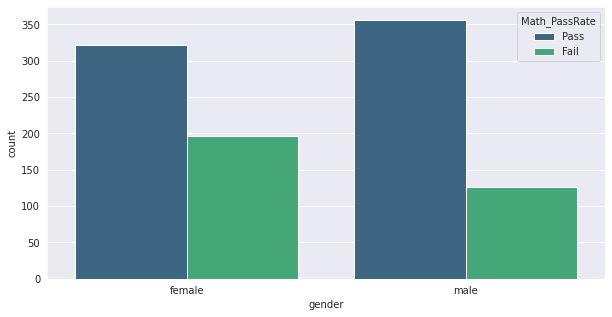

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = students, hue = 'Math_PassRate', palette = 'viridis')

Below is the pass rate table and countplot for males and females on the reading exam:

In [41]:
reading_table = pd.crosstab(index = students['gender'], columns = students['Reading_PassRate'])
reading_table['PercentPass'] = round(reading_table['Pass'] / (reading_table['Pass'] + reading_table['Fail'])*100,2)
reading_table

Reading_PassRate,Fail,Pass,PercentPass
gender,,,
female,91,427,82.43
male,163,319,66.18


<AxesSubplot:xlabel='gender', ylabel='count'>

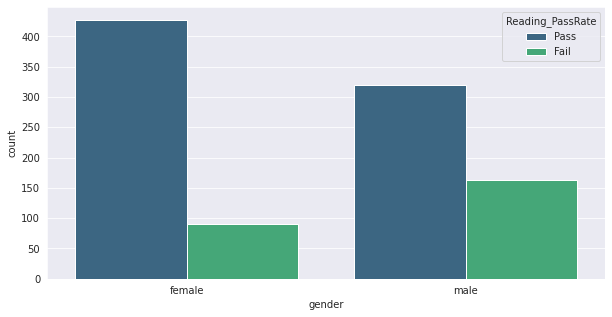

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = students, hue = 'Reading_PassRate', palette = 'viridis')

Below is the pass rate table and countplot for males and females on the writing exam:

In [43]:
writing_table = pd.crosstab(index = students['gender'], columns = students['Writing_PassRate'])
writing_table['PercentPass'] = round(writing_table['Pass'] / (writing_table['Pass'] + writing_table['Fail'])*100,2)
writing_table

Writing_PassRate,Fail,Pass,PercentPass
gender,,,
female,94,424,81.85
male,187,295,61.20


<AxesSubplot:xlabel='gender', ylabel='count'>

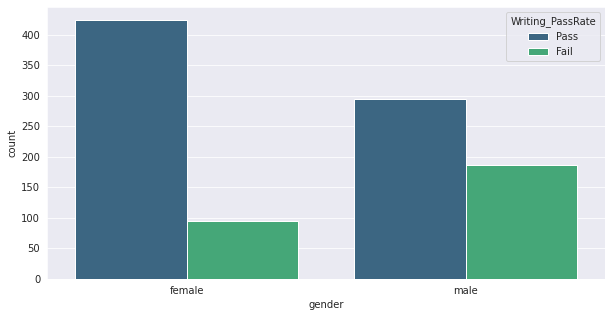

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = students, hue = 'Writing_PassRate', palette = 'viridis')

From the information above, females passed the reading and writing exams more consistently than males. However, males passed the math exam more consistently than females.

Below are the pass rate tables and countplots for each exam based on race/ethnicity:

In [45]:
math_table_re = pd.crosstab(index = students['race/ethnicity'], columns = students['Math_PassRate'])
math_table_re['PercentPass'] = round(math_table_re['Pass'] / (math_table_re['Pass'] + math_table_re['Fail'])*100,2)
math_table_re

Math_PassRate,Fail,Pass,PercentPass
race/ethnicity,,,
group A,42,47,52.81
group B,71,119,62.63
group C,113,206,64.58
group D,72,190,72.52
group E,25,115,82.14


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

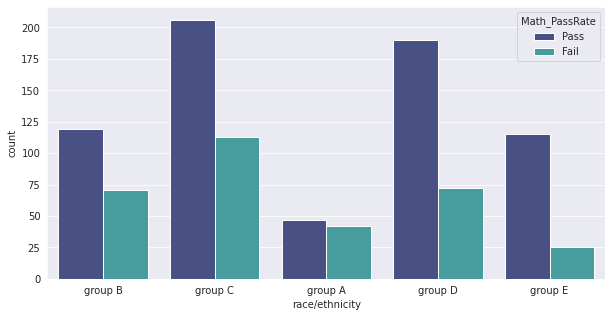

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'race/ethnicity', data = students, hue = 'Math_PassRate', palette = 'mako')

In [47]:
read_table_re = pd.crosstab(index = students['race/ethnicity'], columns = students['Reading_PassRate'])
read_table_re['PercentPass'] = round(read_table_re['Pass'] / (read_table_re['Pass'] + read_table_re['Fail'])*100,2)
read_table_re

Reading_PassRate,Fail,Pass,PercentPass
race/ethnicity,,,
group A,35,54,60.67
group B,55,135,71.05
group C,75,244,76.49
group D,62,200,76.34
group E,27,113,80.71


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

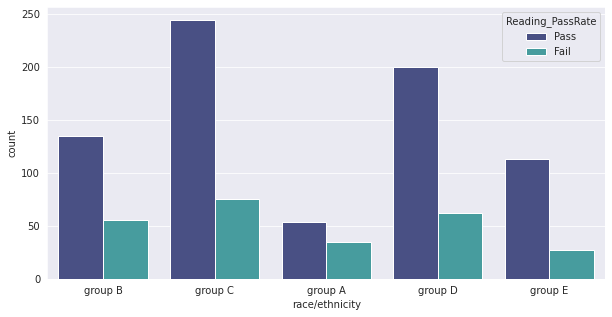

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'race/ethnicity', data = students, hue = 'Reading_PassRate', palette = 'mako')

In [49]:
write_table_re = pd.crosstab(index = students['race/ethnicity'], columns = students['Writing_PassRate'])
write_table_re['PercentPass'] = round(write_table_re['Pass'] / (write_table_re['Pass'] + write_table_re['Fail'])*100,2)
write_table_re

Writing_PassRate,Fail,Pass,PercentPass
race/ethnicity,,,
group A,37,52,58.43
group B,61,129,67.89
group C,94,225,70.53
group D,59,203,77.48
group E,30,110,78.57


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

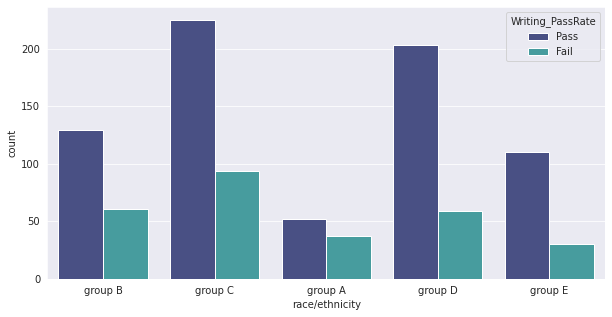

In [50]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'race/ethnicity', data = students, hue = 'Writing_PassRate', palette = 'mako')

From the information above, group E had the highest pass percentage for each exam, while group A had the lowest pass percentage for each exam.

Below are the pass rate tables and countplots for each exam based on parental level of education:

In [51]:
math_table_parent = pd.crosstab(index = students['parental level of education'], columns = students['Math_PassRate'])
math_table_parent['PercentPass'] = round(math_table_parent['Pass'] / (math_table_parent['Pass'] + math_table_parent['Fail'])*100,2)
math_table_parent

Math_PassRate,Fail,Pass,PercentPass
parental level of education,,,
associate's degree,72,150,67.57
bachelor's degree,27,91,77.12
high school,79,117,59.69
master's degree,17,42,71.19
some college,64,162,71.68
some high school,64,115,64.25


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

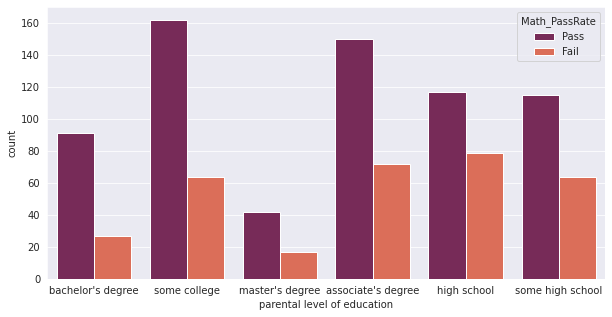

In [52]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'parental level of education', data = students, hue = 'Math_PassRate', palette = 'rocket')

In [53]:
read_table_parent = pd.crosstab(index = students['parental level of education'], columns = students['Reading_PassRate'])
read_table_parent['PercentPass'] = round(read_table_parent['Pass'] / (read_table_parent['Pass'] + read_table_parent['Fail'])*100,2)
read_table_parent

Reading_PassRate,Fail,Pass,PercentPass
parental level of education,,,
associate's degree,51,171,77.03
bachelor's degree,20,98,83.05
high school,68,128,65.31
master's degree,9,50,84.75
some college,51,175,77.43
some high school,55,124,69.27


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

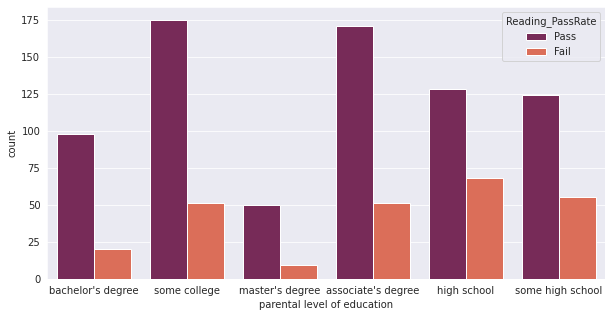

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'parental level of education', data = students, hue = 'Reading_PassRate', palette = 'rocket')

In [55]:
write_table_parent = pd.crosstab(index = students['parental level of education'], columns = students['Writing_PassRate'])
write_table_parent['PercentPass'] = round(write_table_parent['Pass'] / (write_table_parent['Pass'] + write_table_parent['Fail'])*100,2)
write_table_parent

Writing_PassRate,Fail,Pass,PercentPass
parental level of education,,,
associate's degree,58,164,73.87
bachelor's degree,20,98,83.05
high school,77,119,60.71
master's degree,8,51,86.44
some college,55,171,75.66
some high school,63,116,64.80


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

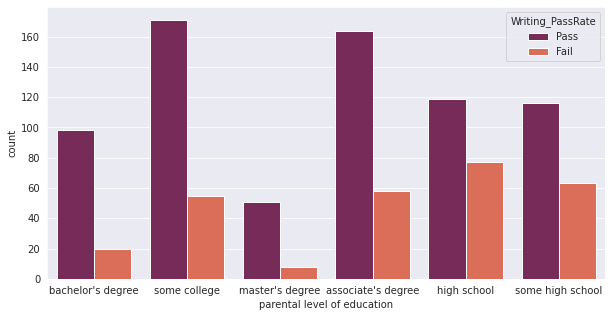

In [56]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'parental level of education', data = students, hue = 'Writing_PassRate', palette = 'rocket')

From the information above, students whose parents received a master's degree had the highest pass percentage for the reading and writing exams, while students whose parents received a bachelor's degree had the highest pass percentage for the math exam. Students whose parent's received a high school degree only had the lowest pass percentage for each exam.


Below are the pass rate tables and countplots for each exam based on test preparation course completion:

In [57]:
math_table_course = pd.crosstab(index = students['test preparation course'], columns = students['Math_PassRate'])
math_table_course['PercentPass'] = round(math_table_course['Pass'] / (math_table_course['Pass'] + math_table_course['Fail'])*100,2)
math_table_course

Math_PassRate,Fail,Pass,PercentPass
test preparation course,,,
completed,87,271,75.70
none,236,406,63.24


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

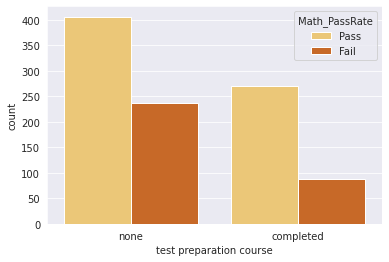

In [58]:
sns.countplot(x = 'test preparation course', data = students, hue = 'Math_PassRate', palette = 'YlOrBr')

In [59]:
read_table_course = pd.crosstab(index = students['test preparation course'], columns = students['Reading_PassRate'])
read_table_course['PercentPass'] = round(read_table_course['Pass'] / (read_table_course['Pass'] + read_table_course['Fail'])*100,2)
read_table_course

Reading_PassRate,Fail,Pass,PercentPass
test preparation course,,,
completed,56,302,84.36
none,198,444,69.16


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

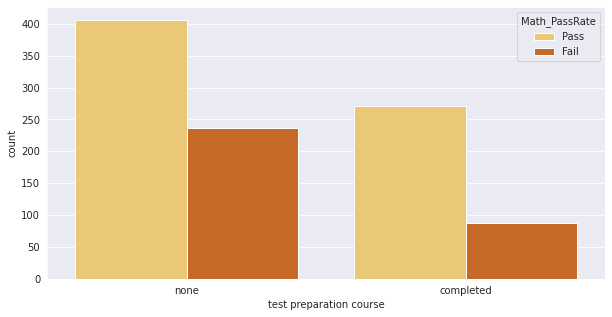

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'test preparation course', data = students, hue = 'Math_PassRate', palette = 'YlOrBr')

In [61]:
write_table_course = pd.crosstab(index = students['test preparation course'], columns = students['Writing_PassRate'])
write_table_course['PercentPass'] = round(write_table_course['Pass'] / (write_table_course['Pass'] + write_table_course['Fail'])*100,2)
write_table_course

Writing_PassRate,Fail,Pass,PercentPass
test preparation course,,,
completed,50,308,86.03
none,231,411,64.02


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

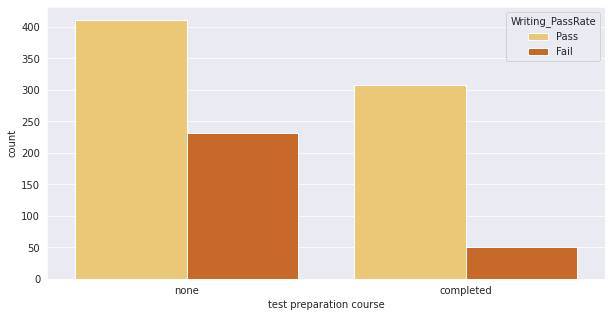

In [62]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'test preparation course', data = students, hue = 'Writing_PassRate', palette = 'YlOrBr')

From the information above, students who completed the test preparation course had the highest pass percentage for each exam.


Below are the pass rate tables and countplots for each exam based on lunch program:

In [63]:
math_table_lunch = pd.crosstab(index = students['lunch'], columns = students['Math_PassRate'])
math_table_lunch['PercentPass'] = round(math_table_lunch['Pass'] / (math_table_lunch['Pass'] + math_table_lunch['Fail'])*100,2)
math_table_lunch

Math_PassRate,Fail,Pass,PercentPass
lunch,,,
free/reduced,175,180,50.70
standard,148,497,77.05


<AxesSubplot:xlabel='lunch', ylabel='count'>

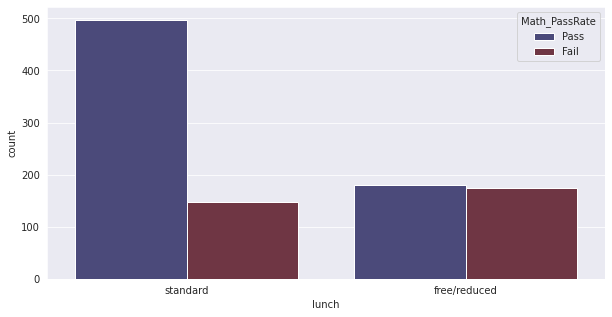

In [64]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'lunch', data = students, hue = 'Math_PassRate', palette = 'icefire')

In [65]:
read_table_lunch = pd.crosstab(index = students['lunch'], columns = students['Reading_PassRate'])
read_table_lunch['PercentPass'] = round(read_table_lunch['Pass'] / (read_table_lunch['Pass'] + read_table_lunch['Fail'])*100,2)
read_table_lunch

Reading_PassRate,Fail,Pass,PercentPass
lunch,,,
free/reduced,130,225,63.38
standard,124,521,80.78


<AxesSubplot:xlabel='lunch', ylabel='count'>

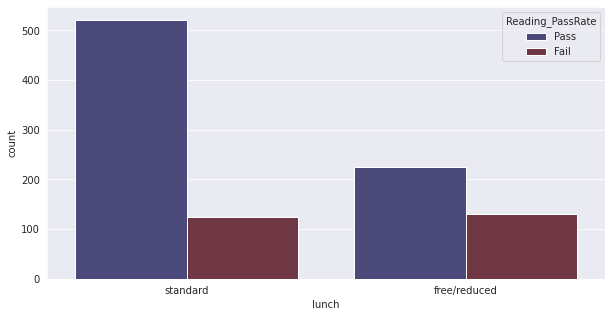

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'lunch', data = students, hue = 'Reading_PassRate', palette = 'icefire')

In [67]:
write_table_lunch = pd.crosstab(index = students['lunch'], columns = students['Writing_PassRate'])
write_table_lunch['PercentPass'] = round(write_table_lunch['Pass'] / (write_table_lunch['Pass'] + write_table_lunch['Fail'])*100,2)
write_table_lunch

Writing_PassRate,Fail,Pass,PercentPass
lunch,,,
free/reduced,144,211,59.44
standard,137,508,78.76


<AxesSubplot:xlabel='lunch', ylabel='count'>

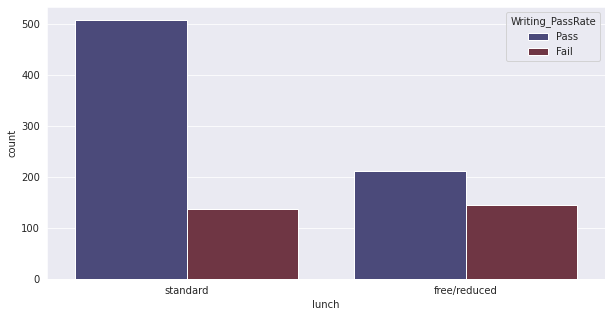

In [68]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'lunch', data = students, hue = 'Writing_PassRate', palette = 'icefire')


From the information above, participants who are in the standard lunch program had the highest pass percentage for each exam.

<a id = 'section-5'></a>
## **Conclusion**

From the Exploratory Data Analysis done, there appears to be a difference in test scores for each group. In order to determine if there is a difference, more analysis should be done, including statistical tests such as t-tests and regression analysis.

 In addition, in a real-world example, it would be beneficial to know if the sample size relates to the population size. For example, there were not a lot of participants in ethnicity group A and there were not a lot of participants whose parents earned a master's degree. It would be important to know if the sample size is comparable to the population size. If not, more participants who fit in these categories would be needed. 